In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [245]:
from sklearn.metrics import classification_report,r2_score,classification_report,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

In [246]:
#step 2 : data importing and analysis

In [247]:
df=pd.read_csv("mhealth_raw_data.csv")
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [249]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,1215745.0,1.494200,3.826485,-22.1460,0.14131,1.308900,2.575800,20.0540
aly,1215745.0,-9.692878,4.171303,-19.6190,-10.20100,-9.670300,-9.042200,21.1610
alz,1215745.0,-0.954806,5.461803,-19.3730,-2.64940,-0.016456,1.301300,25.0150
glx,1215745.0,-0.001599,0.491217,-2.1466,-0.43599,-0.014842,0.448980,60.4840
gly,1215745.0,-0.616632,0.354641,-7.7899,-0.81801,-0.707320,-0.540340,2.0113
glz,1215745.0,-0.158781,0.546798,-2.6267,-0.59332,-0.190570,0.322200,2.7701
arx,1215745.0,-3.713413,4.763586,-22.3610,-6.07600,-2.977600,-1.193700,19.8640
ary,1215745.0,-5.805526,5.757639,-18.9720,-9.40420,-7.461500,-2.533900,22.1910
arz,1215745.0,2.393880,3.876503,-18.2390,0.12965,1.928100,4.914700,25.7410
grx,1215745.0,-0.276106,0.527689,-8.3392,-0.70588,-0.354900,0.096078,3.3196


In [250]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [251]:
df.duplicated().sum()

0

<Axes: xlabel='Activity'>

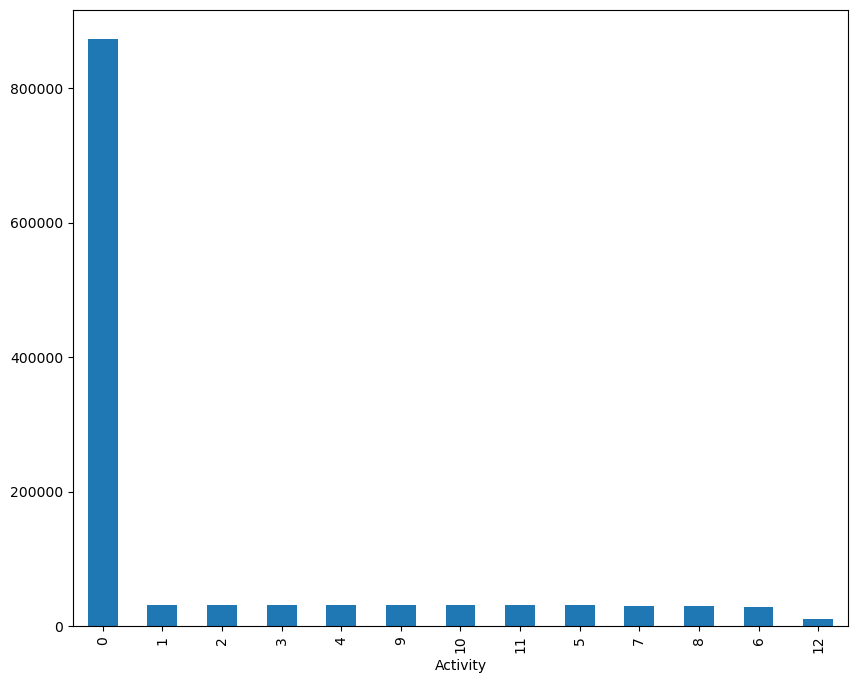

In [252]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [253]:
data_acitivity_0=df[df["Activity"]==0]
data_acitivity_else=df[df["Activity"]!=0]

In [254]:
data_acitivity_0=data_acitivity_0.sample(n=40000)
df=pd.concat([data_acitivity_0,data_acitivity_else])

<Axes: xlabel='Activity'>

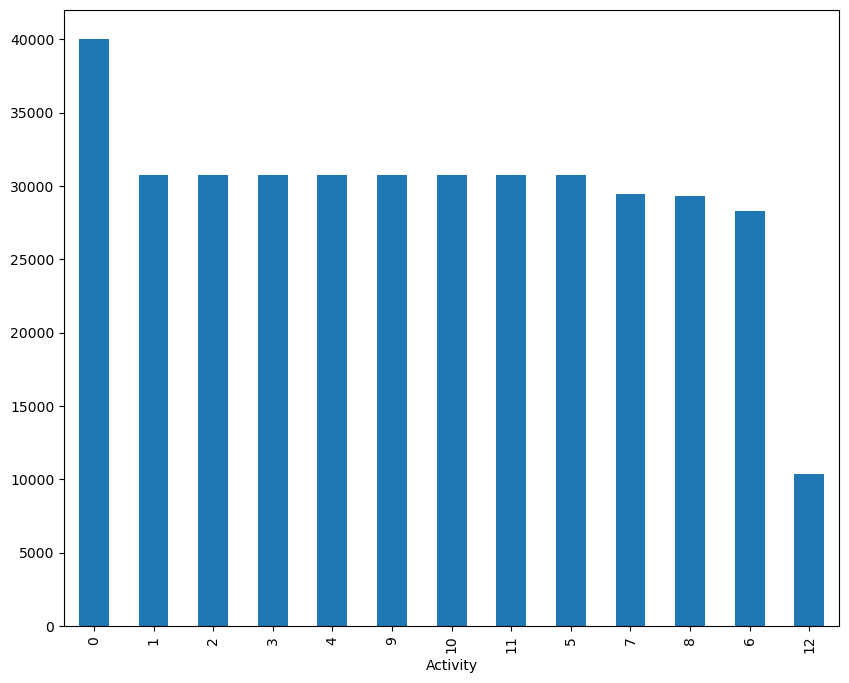

In [255]:

plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [256]:
len(df)

383195

In [257]:
#step 3 EDA

activity_label={
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

==============Standing still (1 min) - a=================


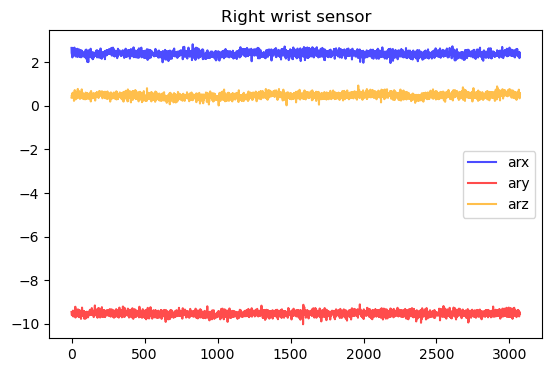

==============Standing still (1 min) - g=================


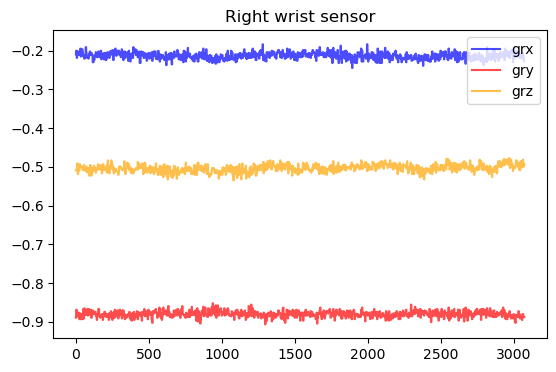

==============Sitting and relaxing (1 min) - a=================


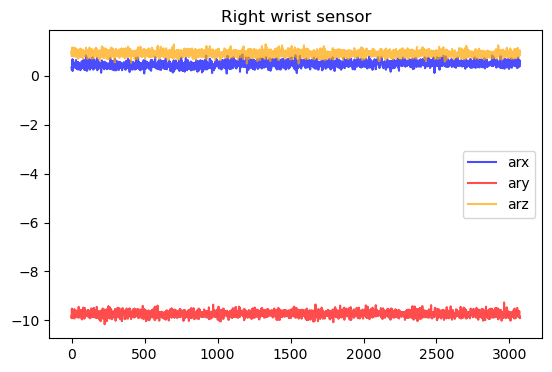

==============Sitting and relaxing (1 min) - g=================


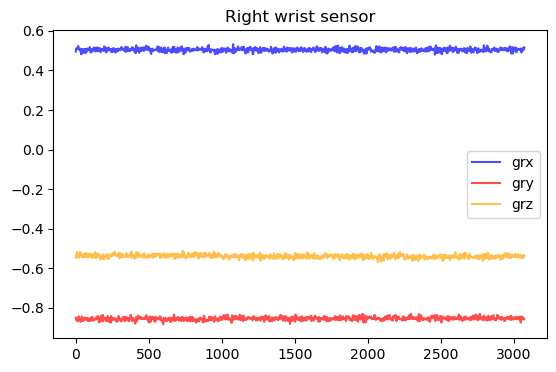

==============Lying down (1 min) - a=================


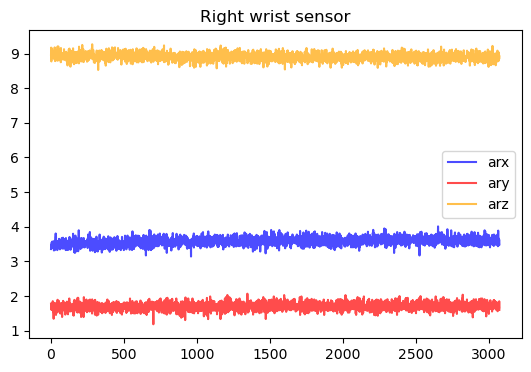

==============Lying down (1 min) - g=================


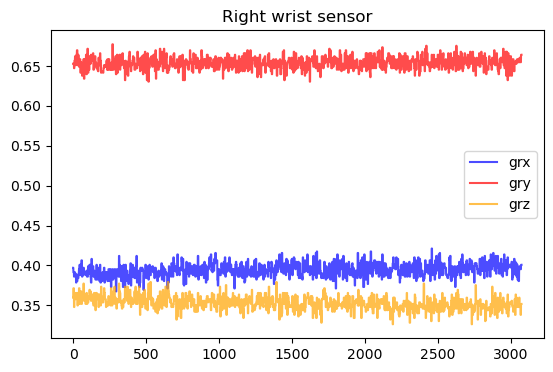

==============Walking (1 min) - a=================


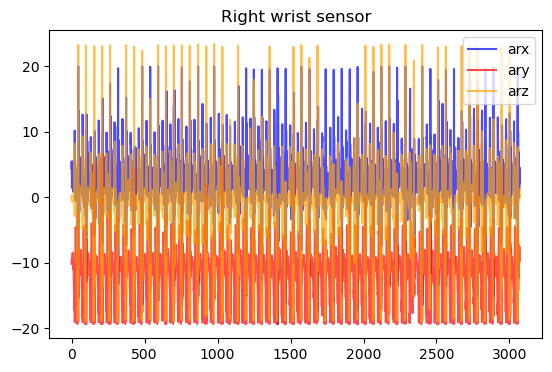

==============Walking (1 min) - g=================


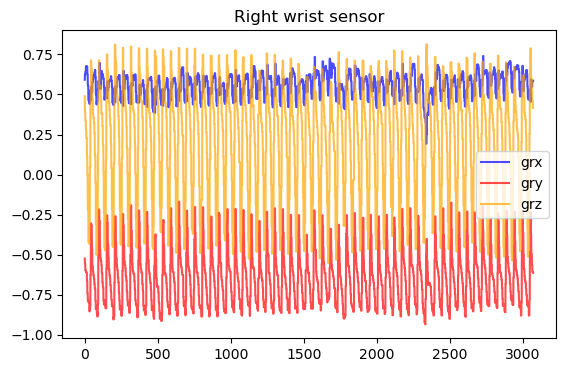

==============Climbing stairs (1 min) - a=================


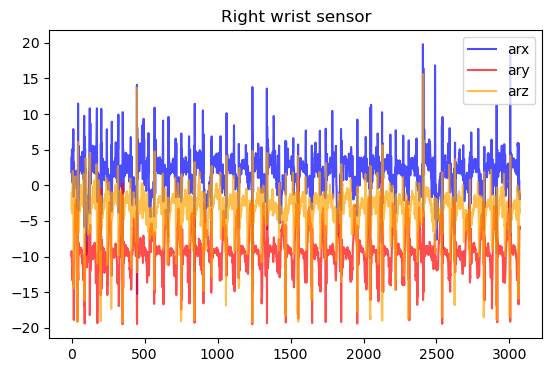

==============Climbing stairs (1 min) - g=================


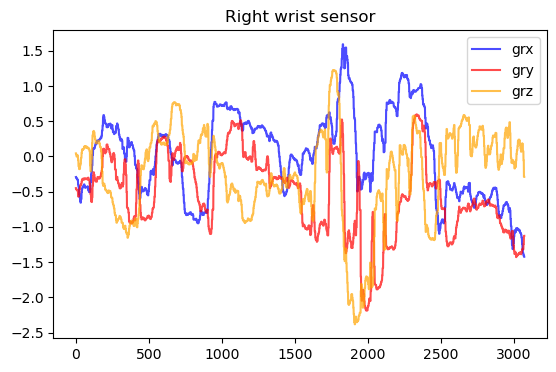

==============Waist bends forward (20x) - a=================


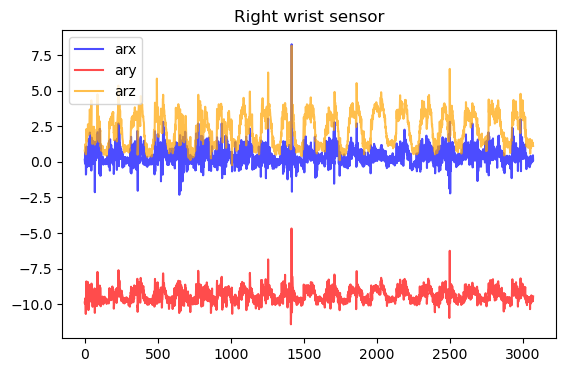

==============Waist bends forward (20x) - g=================


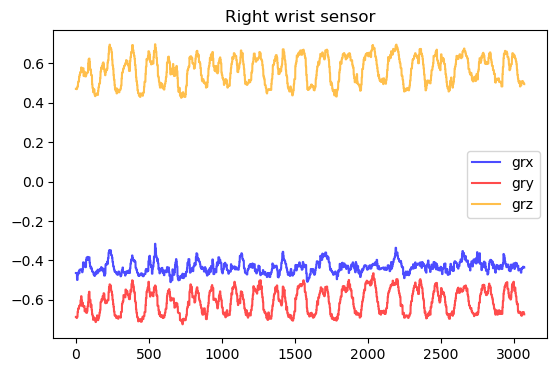

==============Frontal elevation of arms (20x) - a=================


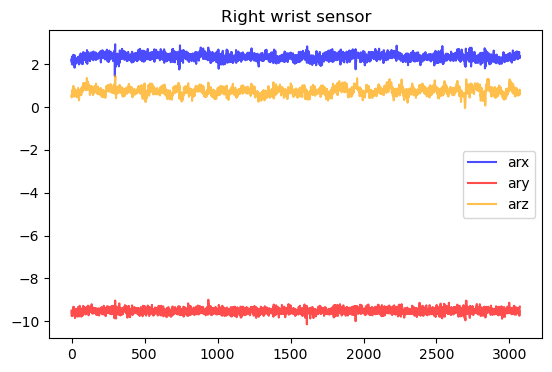

==============Frontal elevation of arms (20x) - g=================


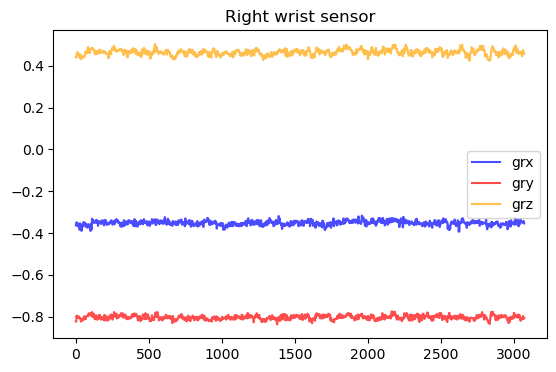

==============Knees bending (crouching) (20x) - a=================


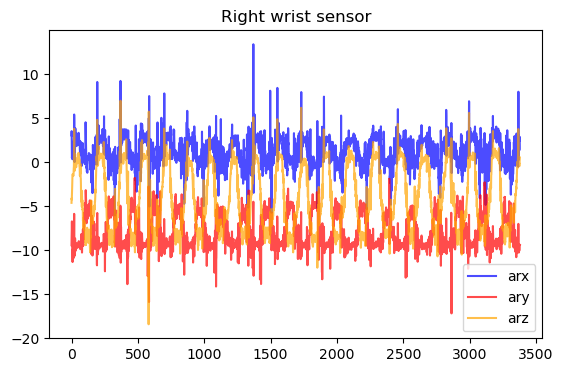

==============Knees bending (crouching) (20x) - g=================


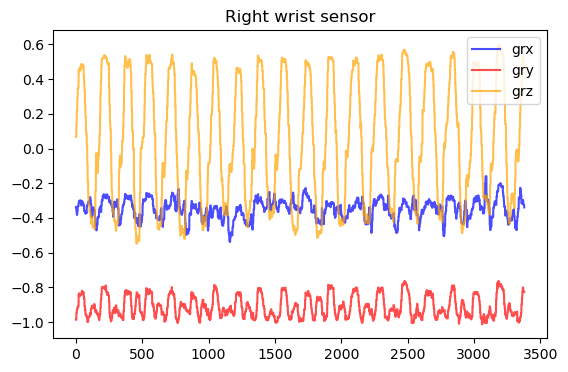

==============Cycling (1 min) - a=================


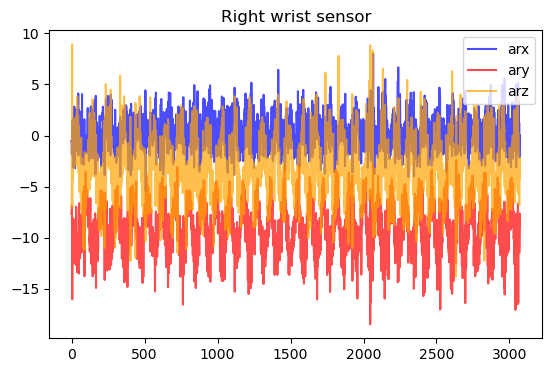

==============Cycling (1 min) - g=================


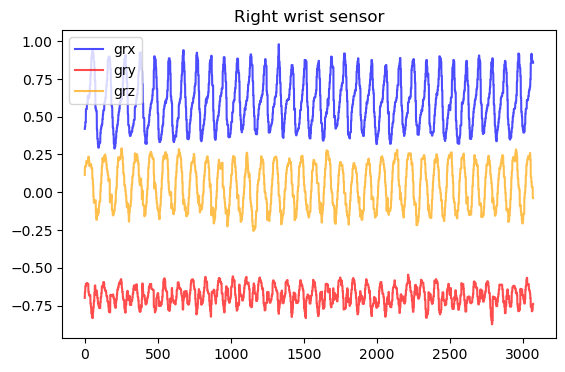

==============Jogging (1 min) - a=================


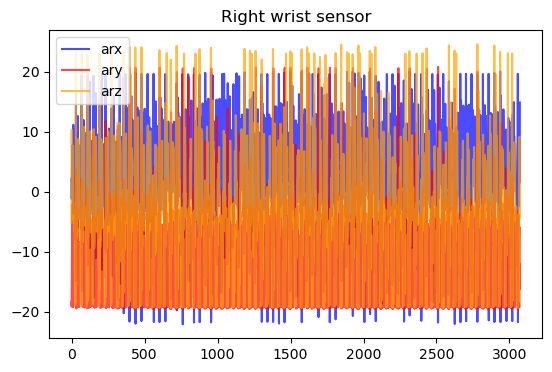

==============Jogging (1 min) - g=================


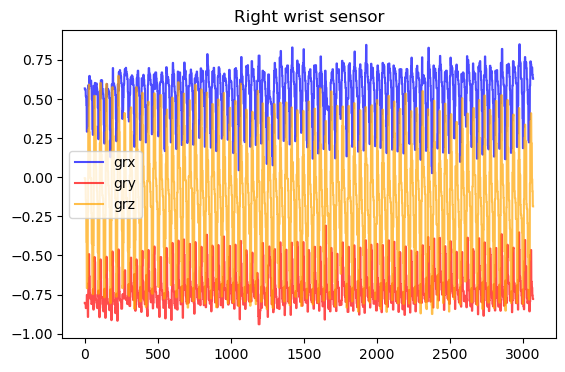

==============Running (1 min) - a=================


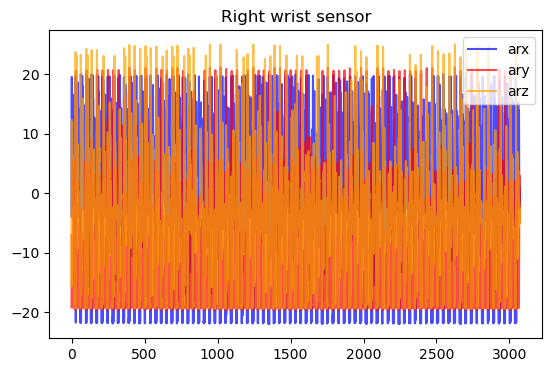

==============Running (1 min) - g=================


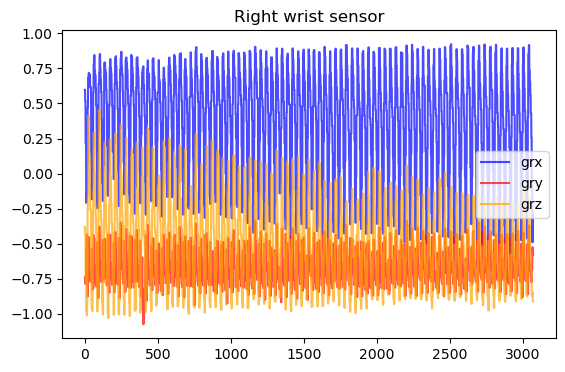

==============Jump front & back (20x) - a=================


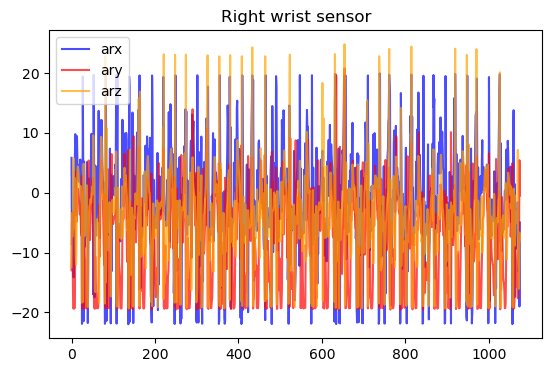

==============Jump front & back (20x) - g=================


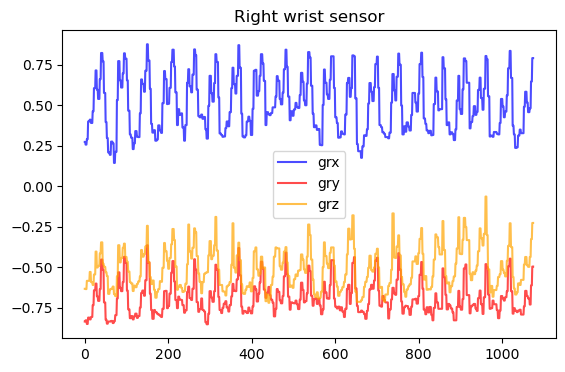

In [258]:
subject1=df[df['subject']=='subject1']
readings=['a','g']
for i in range(1,13):
    for r in readings:
        print(f"=============={activity_label[i]} - {r}=================")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lx"],color='blue',alpha=0.7,label=r + "rx")
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "ly"],color='red',alpha=0.7,label=r + "ry")
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lz"],color='orange',alpha=0.7,label=r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()
        

==============Standing still (1 min) - a=================


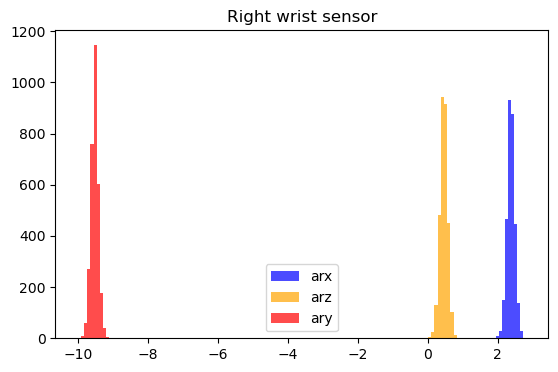

==============Standing still (1 min) - g=================


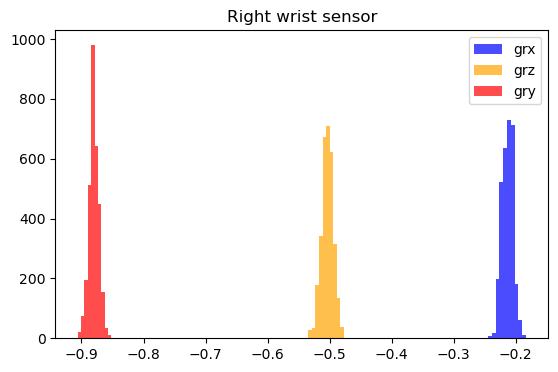

==============Sitting and relaxing (1 min) - a=================


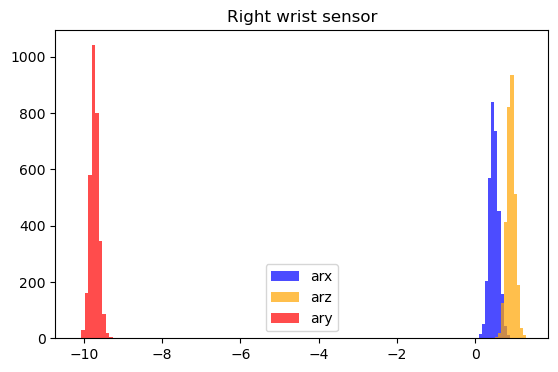

==============Sitting and relaxing (1 min) - g=================


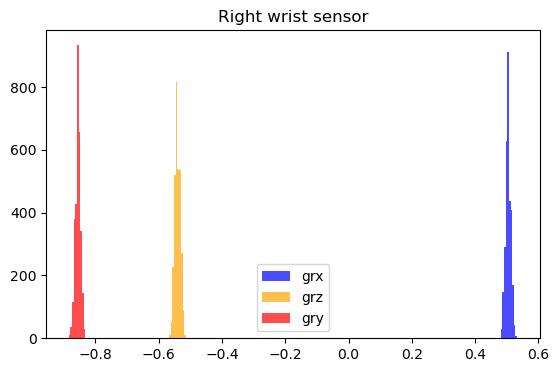

==============Lying down (1 min) - a=================


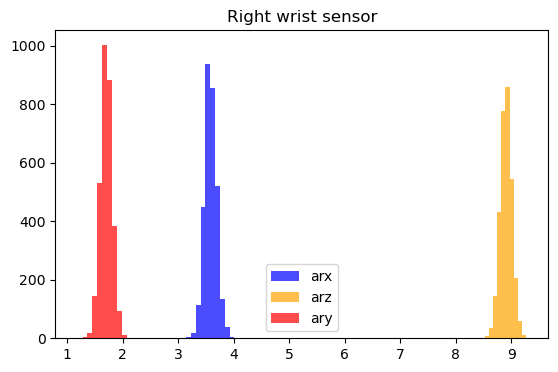

==============Lying down (1 min) - g=================


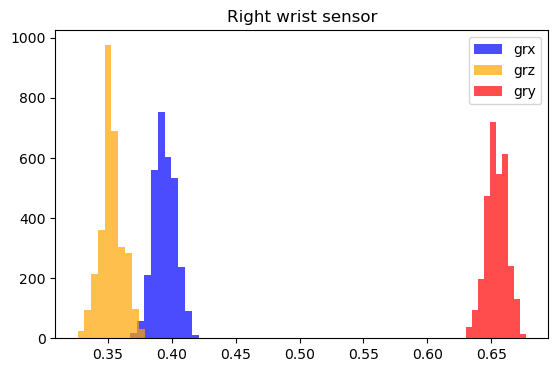

==============Walking (1 min) - a=================


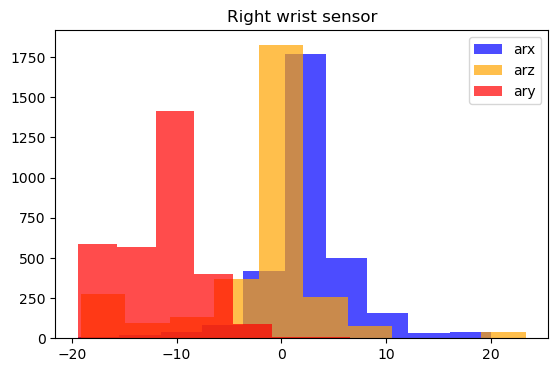

==============Walking (1 min) - g=================


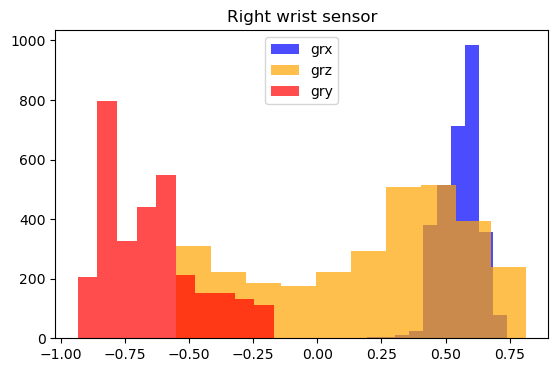

==============Climbing stairs (1 min) - a=================


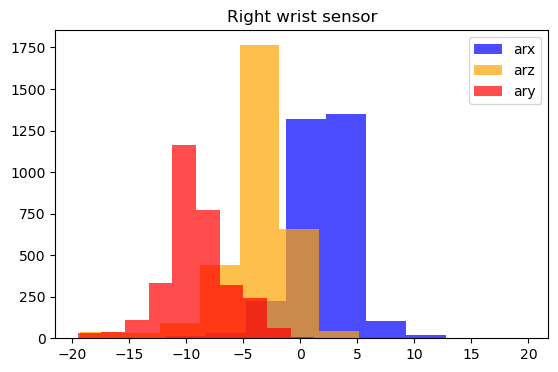

==============Climbing stairs (1 min) - g=================


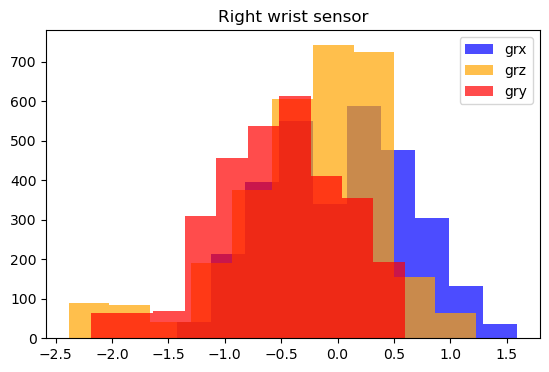

==============Waist bends forward (20x) - a=================


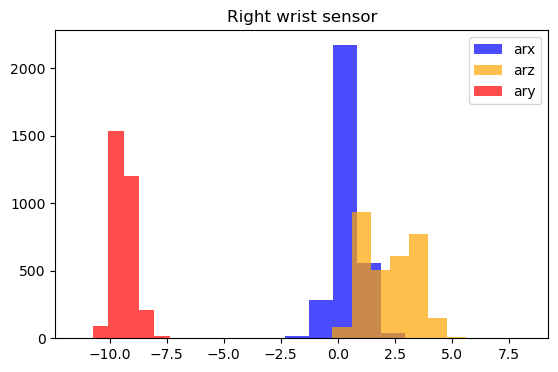

==============Waist bends forward (20x) - g=================


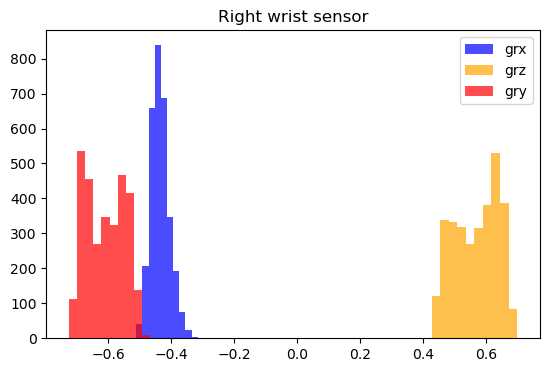

==============Frontal elevation of arms (20x) - a=================


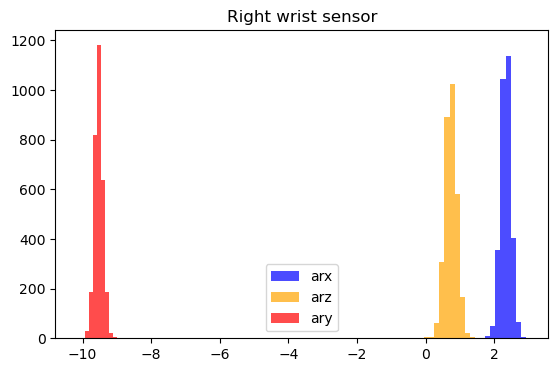

==============Frontal elevation of arms (20x) - g=================


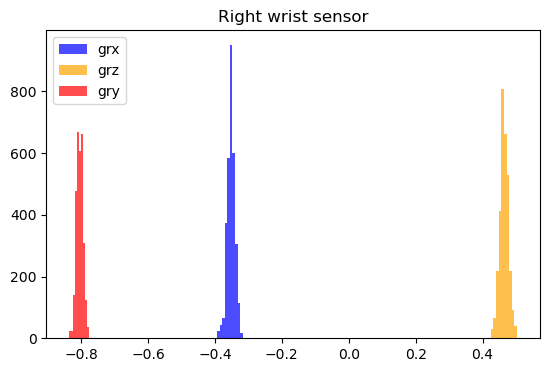

==============Knees bending (crouching) (20x) - a=================


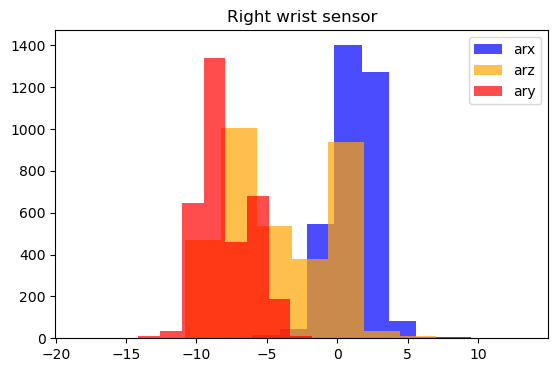

==============Knees bending (crouching) (20x) - g=================


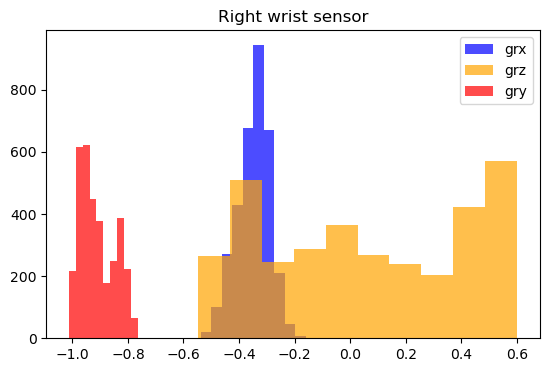

==============Cycling (1 min) - a=================


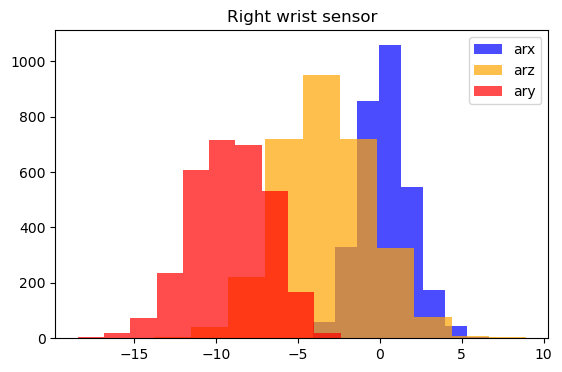

==============Cycling (1 min) - g=================


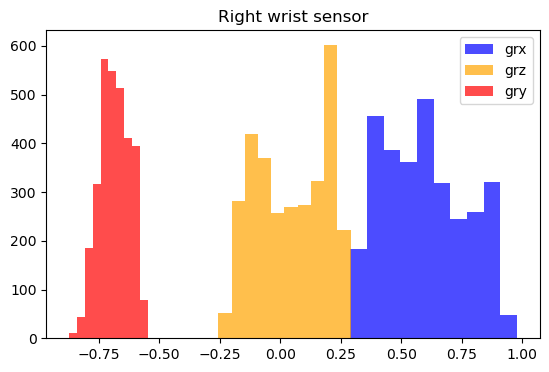

==============Jogging (1 min) - a=================


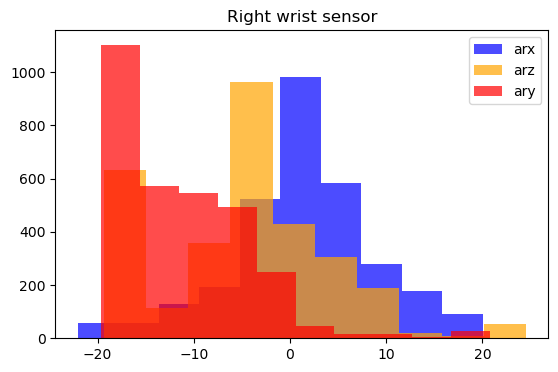

==============Jogging (1 min) - g=================


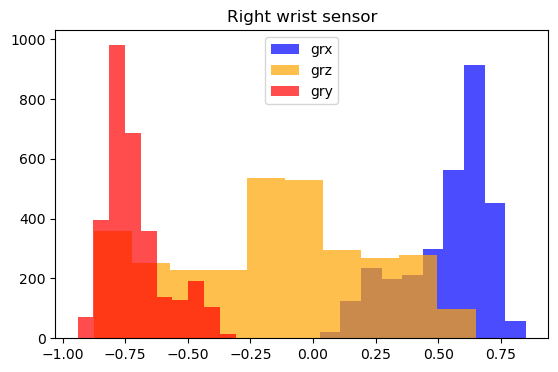

==============Running (1 min) - a=================


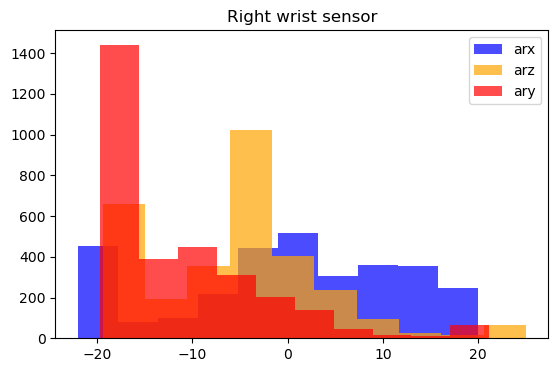

==============Running (1 min) - g=================


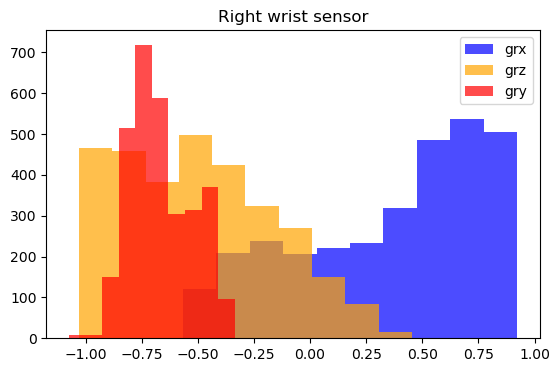

==============Jump front & back (20x) - a=================


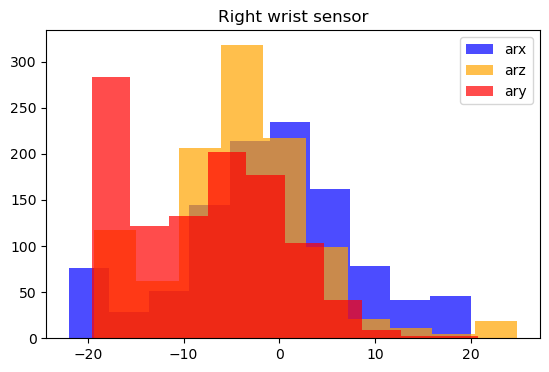

==============Jump front & back (20x) - g=================


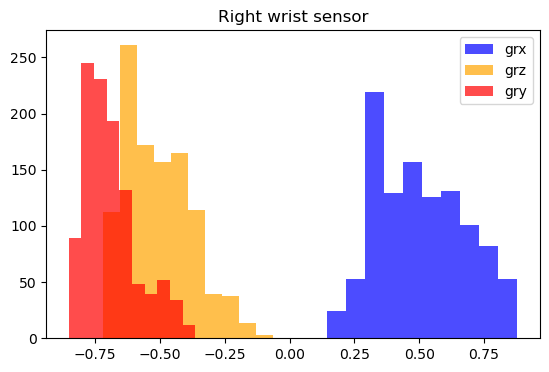

In [259]:
subject1=df[df['subject']=='subject1']
readings=['a','g']
for i in range(1,13):
    for r in readings:
        print(f"=============={activity_label[i]} - {r}=================")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lx"],color='blue',alpha=0.7,label=r + "rx")
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lz"],color='orange',alpha=0.7,label=r + "rz")
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "ly"],color='red',alpha=0.7,label=r + "ry")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()
        

In [260]:
df['Activity']=df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],["None",
                                                                    "Standing still (1 min)",
                                                                    "Sitting and relaxing (1 min)",
                                                                    "Lying down (1 min)",
                                                                    "Walking (1 min)",
                                                                    "Climbing stairs (1 min)",
                                                                    "Waist bends forward (20x)",
                                                                    "Frontal elevation of arms (20x)",
                                                                    "Knees bending (crouching) (20x)",
                                                                    "Cycling (1 min)",
                                                                    "Jogging (1 min)",
                                                                    "Running (1 min)",
                                                                    "Jump front & back (20x)"])

In [261]:
df['Activity']

17617                         None
1215537                       None
166139                        None
970376                        None
998313                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [262]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

<Axes: ylabel='count'>

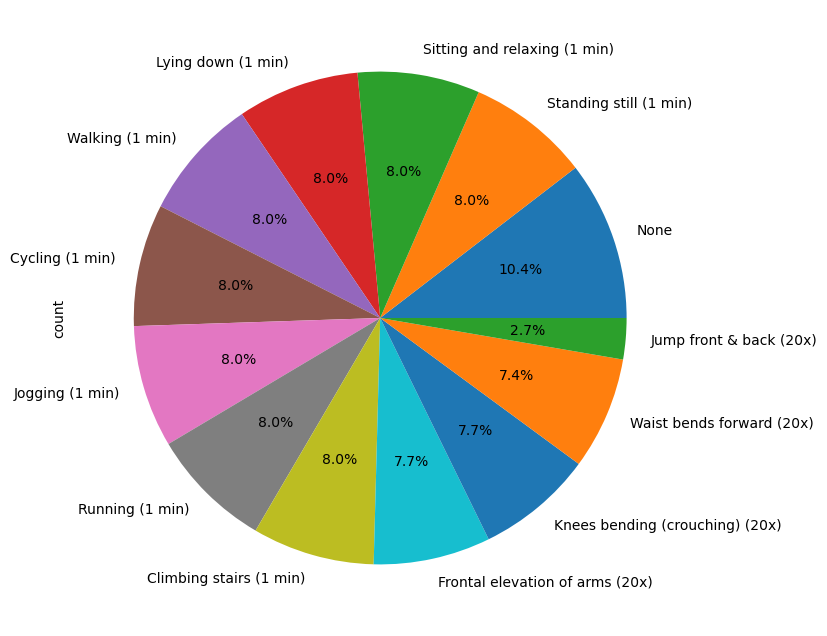

In [263]:
plt.figure(figsize=(12,8))
round(df['Activity'].value_counts()/df.shape[0]*100,2).plot.pie(autopct='%2.1f%%')

In [264]:
df1 = df.copy()
for feature in df1.columns[:-2]:
    lower_range = np.quantile(df[feature], 0.01)
    upper_range = np.quantile(df[feature], 0.99)
    print(f"{feature} range: {lower_range} to {upper_range}")

    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index,axis=0)
    
    print(f"Shape {df1.shape}")


alx range: -11.51206 to 19.214059999999996
Shape (375531, 14)
aly range: -19.378 to 2.382229999999999
Shape (369659, 14)
alz range: -18.949 to 14.095059999999998
Shape (365842, 14)
glx range: -0.75325 to 0.80891
Shape (358844, 14)
gly range: -1.0694 to 0.96435
Shape (352083, 14)
glz range: -1.1061 to 0.8290799999999999
Shape (346400, 14)
arx range: -21.487 to 9.010224
Shape (341194, 14)
ary range: -18.692 to 11.832
Shape (334997, 14)
arz range: -10.259 to 11.781119999999996
Shape (332326, 14)
grx range: -1.0216 to 0.95294
Shape (328667, 14)
gry range: -1.1437 to 0.91376
Shape (323640, 14)
grz range: -0.7069 to 1.125
Shape (318983, 14)


In [265]:
df1

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
17617,4.03470,1.01580,6.52860,0.014842,0.62289,0.67387,-8.461100,0.880750,0.075288,-0.717650,0.77207,0.224140,None,subject1
1215537,1.76200,-9.68130,0.18981,-0.328390,-0.90619,-0.63851,-3.492100,-7.996000,0.402280,-0.015686,-1.05750,-0.431030,None,subject10
166139,0.16343,-9.62740,1.61400,-0.311690,-0.51220,0.82515,-2.837200,-8.698600,3.138000,-0.966670,-0.76181,0.340520,None,subject2
998313,0.17090,-9.23200,-4.38700,-0.571430,-0.82176,-0.11002,-3.630200,-7.644400,-0.444720,-0.874510,-0.53593,-0.256470,None,subject9
518291,3.73560,-4.32890,-2.19990,-0.662340,-0.33208,-0.84479,-0.003436,-16.305000,0.549360,0.009804,-0.86242,-0.681030,None,subject4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213636,-0.19979,-0.93484,2.55540,0.630800,-0.52533,-0.67976,-4.021200,-0.082645,0.735450,-0.458820,-1.00000,0.122840,Jump front & back (20x),subject10
1213637,-0.33315,-1.23710,-2.91940,0.638220,-0.42777,-0.74853,-2.251500,-0.414790,0.520930,-0.417650,-1.03700,0.088362,Jump front & back (20x),subject10
1213640,6.77570,-15.07500,7.39740,0.619670,-0.33771,-0.82711,-2.279700,-2.358900,2.111200,-0.417650,-1.03700,0.088362,Jump front & back (20x),subject10
1213641,-2.48730,-19.23300,3.46140,0.619670,-0.33771,-0.82711,-8.234800,-4.965200,2.480900,-0.437250,-1.01850,0.079741,Jump front & back (20x),subject10


In [266]:
#step 4 : data preprocessing

In [267]:
le = LabelEncoder()
df['subject']=le.fit_transform(df['subject'])
df['Activity']=le.fit_transform(df['Activity'])


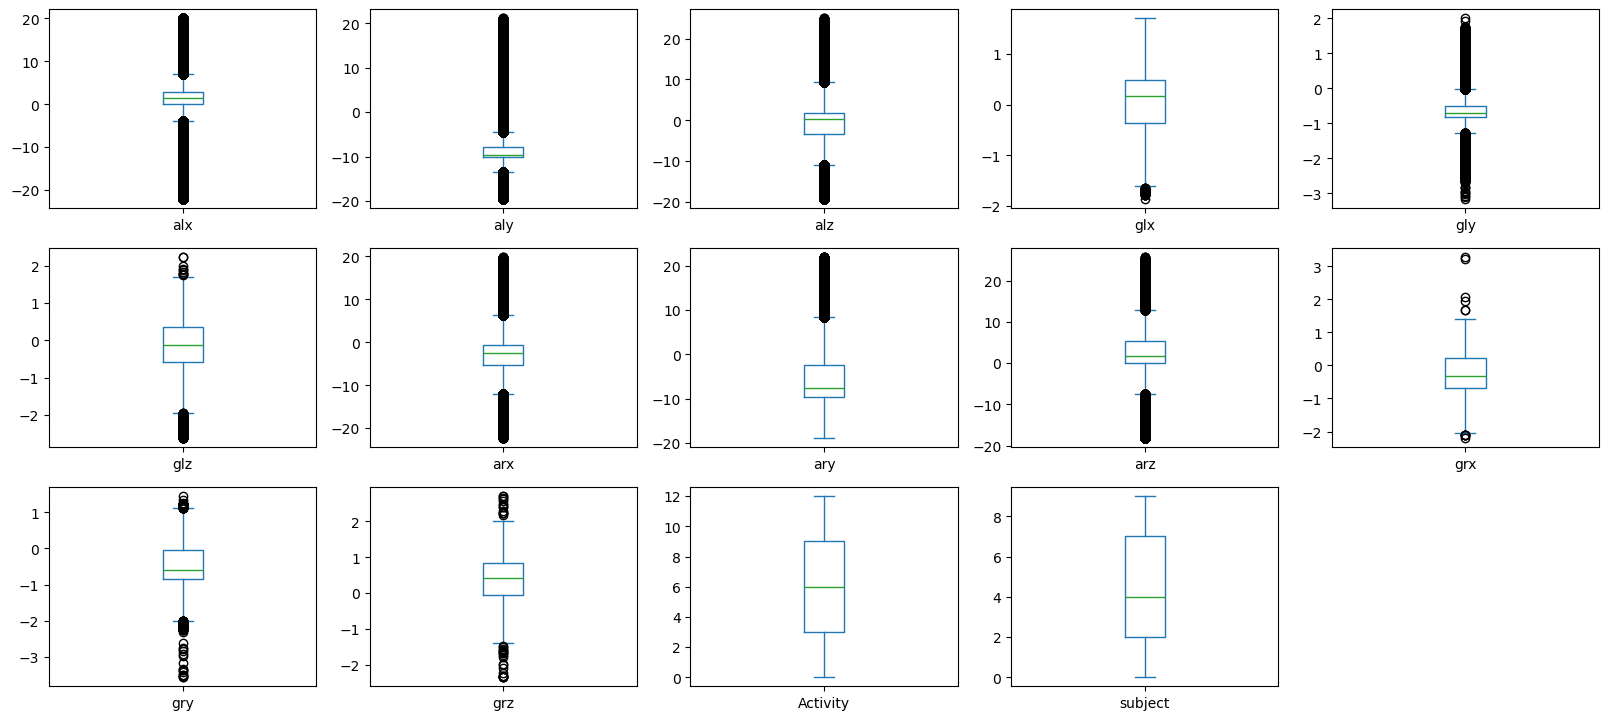

In [268]:
df.plot(kind='box',subplots=True,layout=(5,5), figsize=(20,15))
plt.show()

In [269]:
x=df.drop(["Activity","subject"],axis=1).values
y=df["Activity"].values

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [271]:
ro_scalar=RobustScaler().fit(x_train)
x_train_scaled=ro_scalar.transform(x_train)
x_test_scaled=ro_scalar.transform(x_test)

In [272]:
#step 5 : Building the model

In [273]:
def result(y_true, y_pred,cmv=True):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="macro")
    rec = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")
    
    
    if cmv:
        plt.figure(figsize=(10, 8)) 
        sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=activity_label.values(), yticklabels=activity_label.values())
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    print(f"Accuracy score: {acc:.4%}")
    print(f"Precision score: {prec:.4%}")
    print(f"Recall score: {rec:.4%}")
    print(f"F1 score: {f1:.4%}")


In [274]:
#1 Logistic Regression

lr= LogisticRegression()
lr.fit(x_train,y_train)

lr.score(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5513472699689627

In [275]:
lr.score(x_test,y_test)

0.5496299543836575

In [276]:
lr2=LogisticRegression()
lr2.fit(x_train_scaled,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [277]:
lr2.score(x_train_scaled,y_train)

0.5543153001433562

In [278]:
lr2.score(x_test_scaled,y_test)

0.5528867733483648

In [279]:
y_pred_lr=lr2.predict(x_test_scaled)

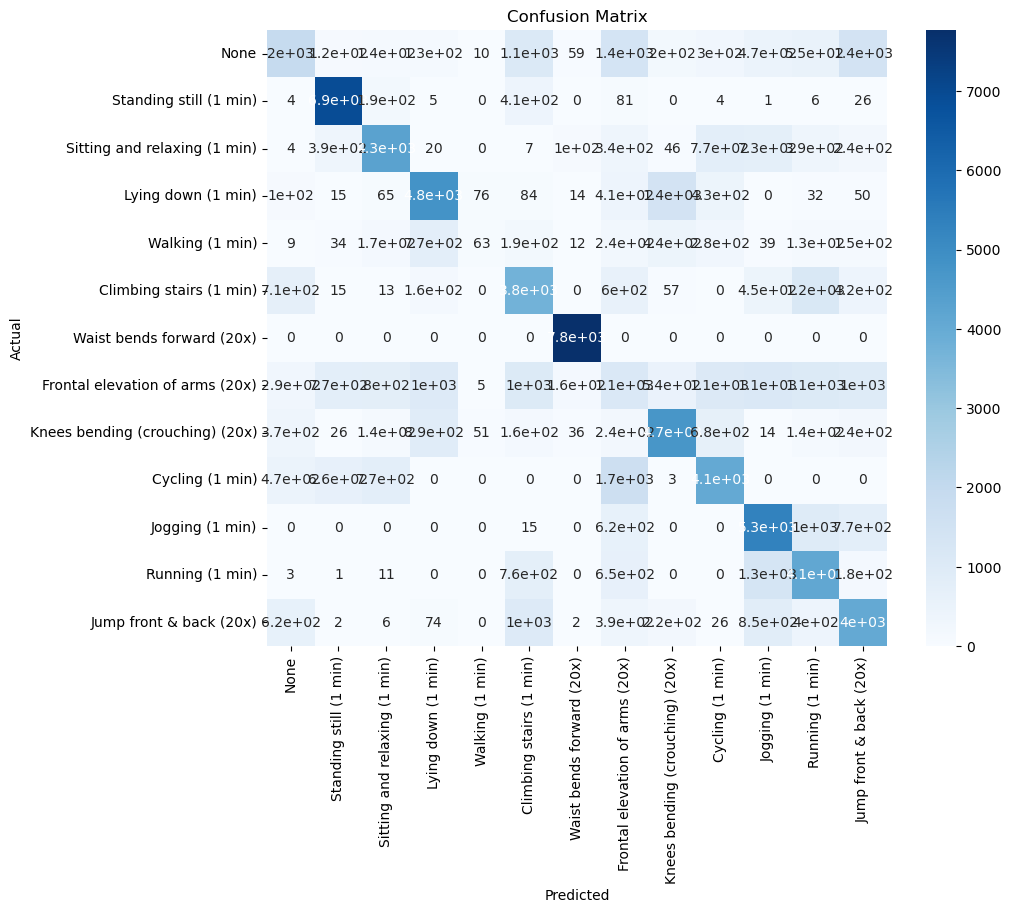

Accuracy score: 55.2887%
Precision score: 53.1211%
Recall score: 53.6494%
F1 score: 52.0090%


In [280]:
result(y_test,y_pred_lr)

In [281]:
knn1=KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [282]:
y_pred_knn=knn1.predict(x_test)

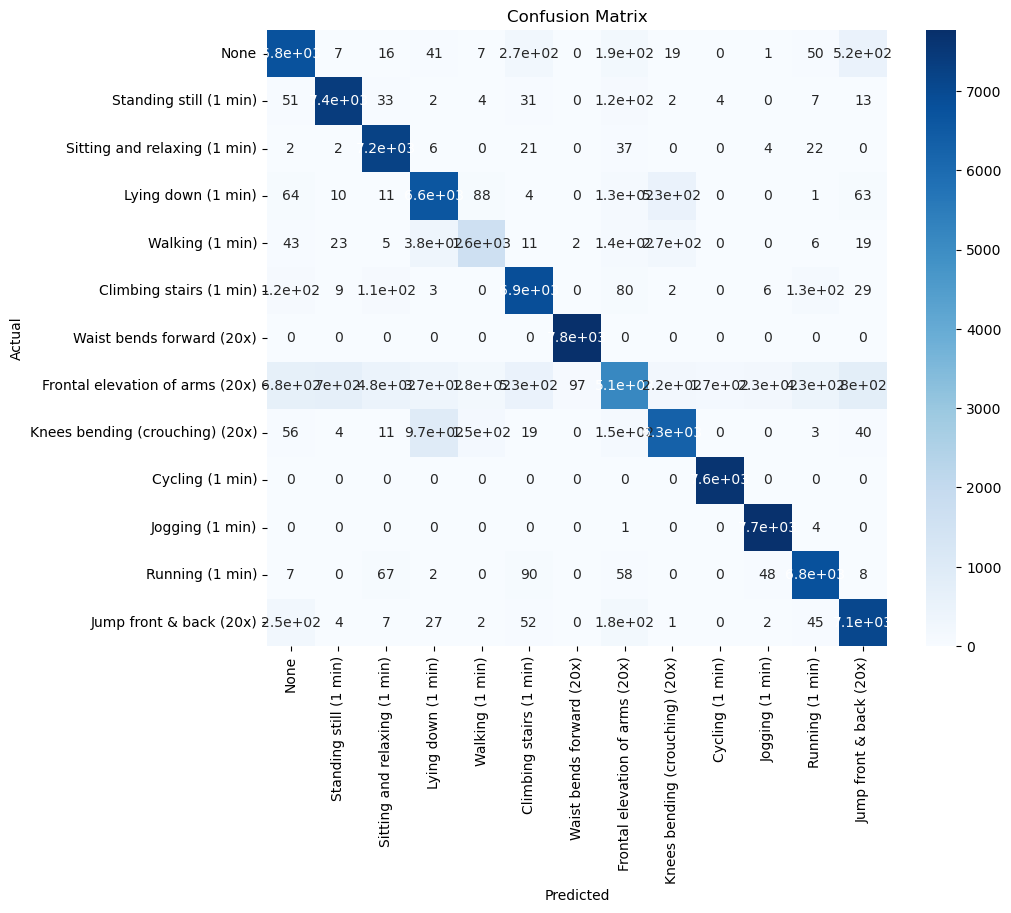

Accuracy score: 88.6220%
Precision score: 88.0539%
Recall score: 88.3555%
F1 score: 87.7794%


In [283]:
result(y_test,y_pred_knn)

In [284]:
knn2=KNeighborsClassifier(n_neighbors=3)
knn2.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [285]:
y_pred_knn2=knn2.predict(x_test_scaled)

In [286]:
result(y_test,y_pred_knn2,False)

Accuracy score: 94.1325%
Precision score: 93.8662%
Recall score: 93.8980%
F1 score: 93.5941%


In [287]:
for n in range(1,11):
    print(f"For n = {n}")
    knn3=KNeighborsClassifier(n_neighbors=n)
    knn3.fit(x_train_scaled,y_train)
    y_pred_knn3=knn3.predict(x_test_scaled)
    result(y_test,y_pred_knn3,False)
#give 3 as optimized value

For n = 1
Accuracy score: 93.9770%
Precision score: 93.6243%
Recall score: 93.7633%
F1 score: 93.5918%
For n = 2
Accuracy score: 93.3434%
Precision score: 92.9882%
Recall score: 93.2424%
F1 score: 92.9257%
For n = 3
Accuracy score: 94.1325%
Precision score: 93.8662%
Recall score: 93.8980%
F1 score: 93.5941%
For n = 4
Accuracy score: 93.9425%
Precision score: 93.7155%
Recall score: 93.7411%
F1 score: 93.4053%
For n = 5
Accuracy score: 93.9206%
Precision score: 93.7059%
Recall score: 93.6959%
F1 score: 93.3558%
For n = 6
Accuracy score: 93.6596%
Precision score: 93.4873%
Recall score: 93.3842%
F1 score: 93.0456%
For n = 7
Accuracy score: 93.5386%
Precision score: 93.3753%
Recall score: 93.2309%
F1 score: 92.8999%
For n = 8
Accuracy score: 93.4060%
Precision score: 93.2930%
Recall score: 93.1264%
F1 score: 92.7712%
For n = 9
Accuracy score: 93.3068%
Precision score: 93.2158%
Recall score: 93.0081%
F1 score: 92.6524%
For n = 10
Accuracy score: 93.1168%
Precision score: 93.0261%
Recall scor

In [288]:
dt=DecisionTreeClassifier(max_depth=14)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
result(y_test,y_pred_dt,False)

Accuracy score: 87.0729%
Precision score: 86.6274%
Recall score: 86.9684%
F1 score: 86.5521%
